# 3. Visualizing distributions of  data. displot()

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Table of contents

[1. Introduction](#intro)
<br>

[2. Displot](#dis)
<br>
- [Histogram](#hist)
- [KDE](#kde)
- [ecdfplot (CDF)](#ecd)
- [rugplot](#rug)

>**Note**: From now on, to shorten these words a little bit, I am going to be referring to *figure-level functions* as `flf` and to *axis-level functions* as `alf`. 

## <a id = 'intro'>Introduction</a>

<br><br>

<div>
    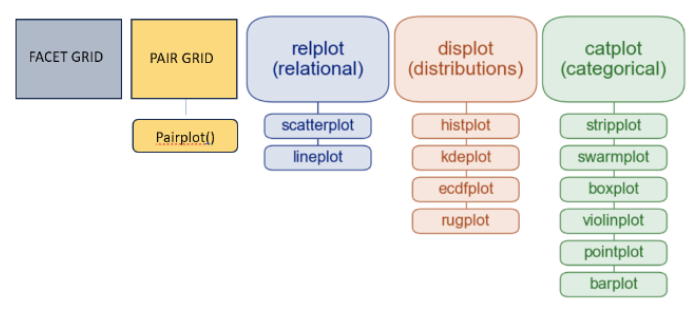
</div>

In this notebook we are going to see is more depth the `displot` family. 

It is not a coincidence that they are separated in that way. Each `flf` family is meant for a specific purpose, different from the rest of the families.


- `relplot` *family* is meant for **visualizing statistical relationships**. This can be done with the `alf`: `scatterplot` and `lineplot`.


- `displot` *family* is meant for **visualizing distributions of data**. This can be done with the `alf`: `histplot`, `kdeplot`, `ecdfplot` and `rugplot`. 


- `catplot` *family* is meant for **visualizing categorical data**. This can be done with the `alf`: `stripplot`, `swarmplot`, `boxplot`, `violinplot`, `pointplot` and `barplot`. 

<br><br>

In this notebook we'll be focusing on the `displot` family.

##  <a id = 'dis'>Displot</a>

First thing I want to start off. is by saying  that `sns.displot(kind = 'rugplot')` doesn't exist. 
`rugplot()` by itself means nothing. It is used along with other `alf` like the `kde`. To  plot the `rug` function along with other `alf` using `displot`, set the attribtue `rug = True`.

So with `displot` we can use `histplot`, `kdeplot`, `ecdflot`.

>As I said in the *0.Seaborn_intro*, it is a good practice to use the `flf`(**displot**) to plot an `alf` (**histplot, kdeflot and ecdfplot**) instead of using the `alf` directly and I justified why. <br><br>
That's why in this noteebook, you will see `sns.histplot()`,  `sns.kdeplot()`,  `ecdfplot()`, only  when needed (i.e plotting different subplots)

In [3]:
# Example of an histplot
penguins = sns.load_dataset("penguins")
penguins.head(6)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
sns.set_theme(style = 'white')

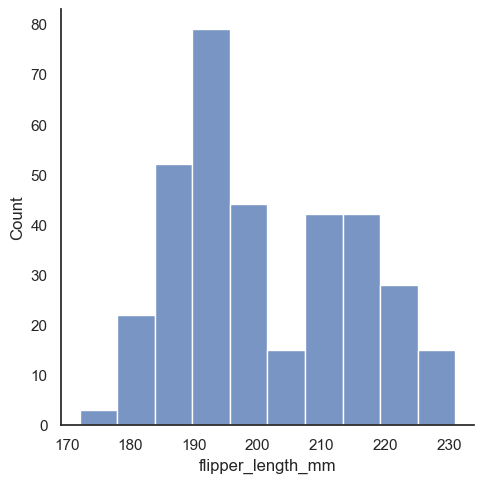

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", kind = 'hist')

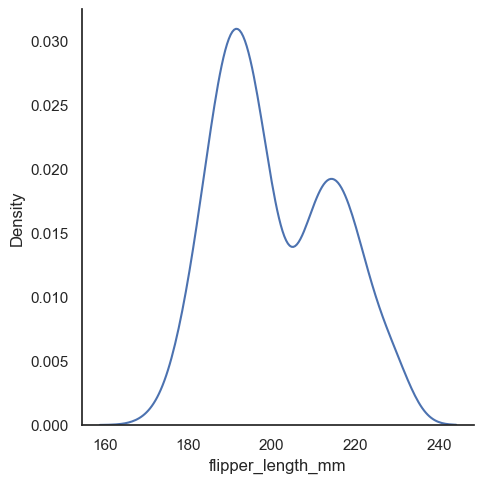

In [6]:
# kde example
sns.displot(data = penguins, x = 'flipper_length_mm', kind = 'kde')

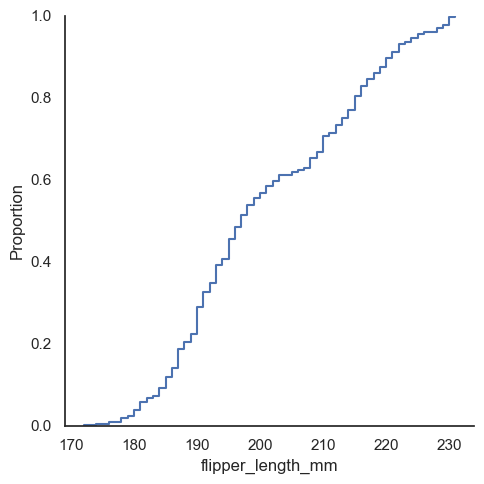

In [7]:
# ecdf example
sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")

###  <a id = 'hist'>Histogram</a>
The `alf histogram` is very useful if we want to take a quick view at the distribution of a certain variable. 

It has some arguments that are worth mentioning.

#### bins & binrange
You can set the number of bars you want to be showed in your graphic.

In other words, you can set the number of intervals in which you want your variable to be divided into. The more intervals, the more precise, but that doesn't mean it is better. It depends on your problem.

It can be passed as:
- An integer: All intervals will be the same length. We can use the attribute `binrange` to set a *range*. 
- A sequence: You define the length of each interval. In other words, the width  of the bars. Therefore `binrange` is not needed.

`binrange` basically is like setting an *x_axis* (usually *x_axis*) limits.

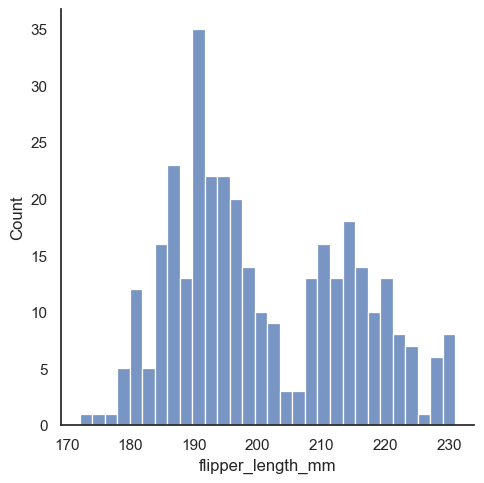

In [8]:
# as an integer
sns.displot(data=penguins, x="flipper_length_mm", bins = 30, kind = 'hist')

<br><br>
Notice that with thinner bins (= more bins), we might see a better, more detailed distribution of our variable.
<br><br>

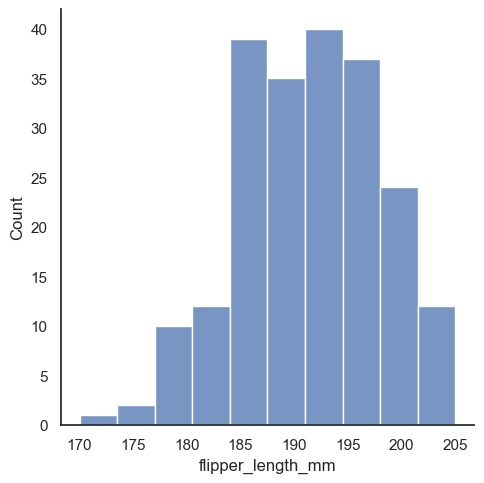

In [9]:
# now with binrange
sns.displot(data=penguins, x="flipper_length_mm", bins = 10,
             binrange =(170, 205), kind = 'hist')

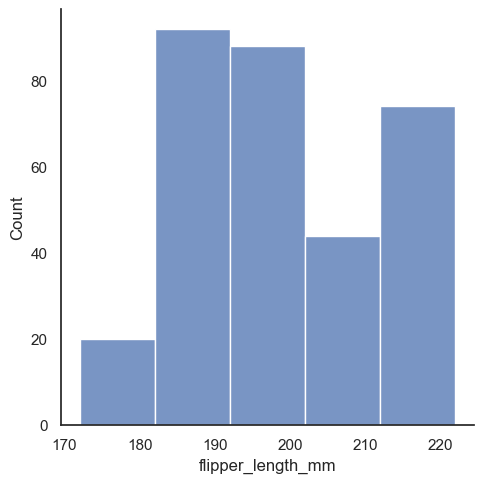

In [10]:
min_value = penguins['flipper_length_mm'].min()
max_value = penguins['flipper_length_mm'].max()
#We want our bins to have a length of 10 mm
bins_seq = np.arange(min_value, max_value, 10)
sns.displot(data=penguins, x="flipper_length_mm", bins = bins_seq, 
           kind = 'hist')

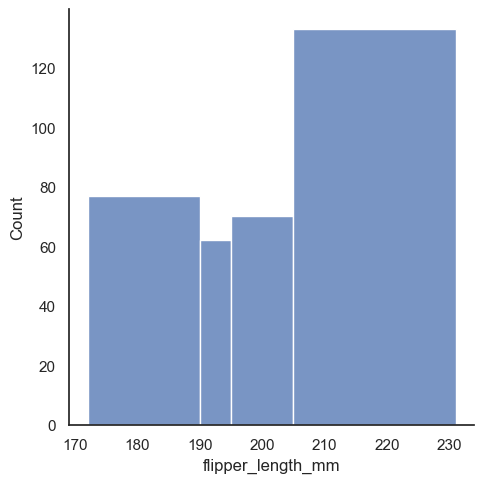

In [11]:
# the sequence doesn't have to be with equal intervals
bins_seq = [min_value, 190, 195, 205, max_value]
sns.displot(data=penguins, x="flipper_length_mm", bins = bins_seq,
            kind = 'hist')

#### binwidth
It's an alternative to `bin_sequence` if the sequence has equal-length intervals. It might not plot the exact same,  but really similar.

Text(0.5, 0.98, 'Both (almost) the same')

<Figure size 640x480 with 0 Axes>

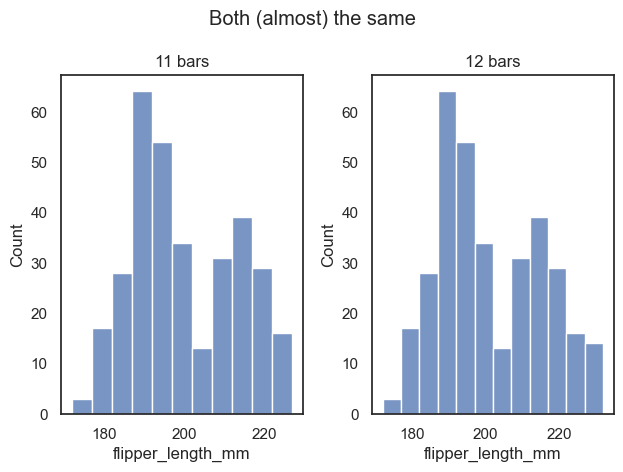

In [12]:
binwidth = 5
bin_seq = np.arange(min_value, max_value, binwidth)
fig = plt.figure()
fig,ax = plt.subplots(1,2, layout = 'tight')
sns.histplot(data = penguins, x ="flipper_length_mm",
            bins = bin_seq, ax = ax[0])
ax[0].set_title('11 bars')

sns.histplot(data = penguins, x ="flipper_length_mm",
            binwidth = binwidth, ax = ax[1])
ax[1].set_title('12 bars')

fig.suptitle('Both (almost) the same')

#### Horizontal histogram
We can do this easily by setting our data into the *y_axis*.

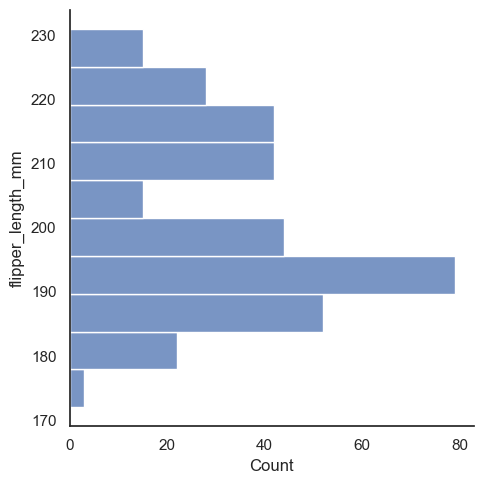

In [13]:
sns.displot(data=penguins, y ="flipper_length_mm", kind = 'hist')

#### Stat
This is one of the most interesting ones. Until now, we have plotted the `flipper_length_mm` variable in the *a_axis*. And, in the *y_axis*

- By default, the *y_axis* are the counts, i.e the number of data we have inside a bin, inside an certain interval. 

But we can change this with `stat`. The other possible values are:
- **count** (default): shows the number of observations in each bin.
- **frequency**: shows the number of observations divided by the bin width.
- **proportion (or probability)**: normalizes such that bar heights sum to 1.
- **percent**: normalizes such that bar heights sum to 100.
- **density**: normalizes such that the total area of the histogram equals 1.

Text(0.5, 0.98, 'Stats`s values')

<Figure size 640x480 with 0 Axes>

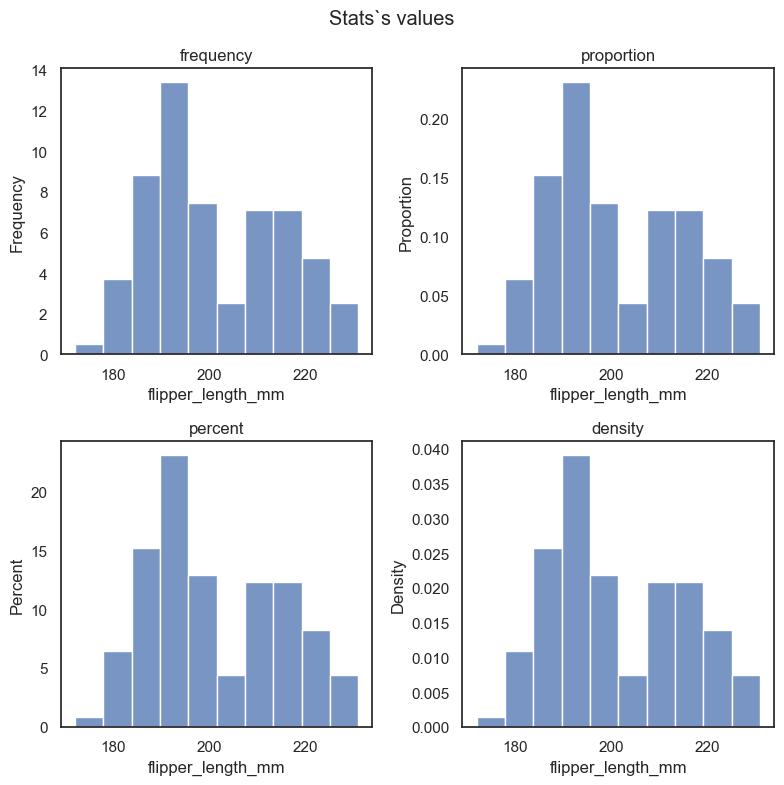

In [14]:
fig = plt.figure()
fig,ax = plt.subplots(2,2, layout = 'tight', figsize = (8,8))

# frequency 
sns.histplot(data = penguins, x ="flipper_length_mm",
            stat = 'frequency', ax = ax[0,0])
ax[0,0].set_title('frequency')

# proportion
sns.histplot(data = penguins, x ="flipper_length_mm",
            stat = 'proportion', ax = ax[0,1])
ax[0,1].set_title('proportion')

# percent
sns.histplot(data = penguins, x ="flipper_length_mm",
            stat = 'percent', ax = ax[1,0])
ax[1,0].set_title('percent')

# density
sns.histplot(data = penguins, x ="flipper_length_mm",
            stat = 'density', ax = ax[1,1])
ax[1,1].set_title('density')

fig.suptitle('Stats`s values')

#### kde & line_kws
Allows you to plot a `kde` (i.e PDF = Probability Density Function) along with the histogram.


It is a `boolean` attribute. `False` by default.


`line_kws` is a dictionary to customize this line plotted.

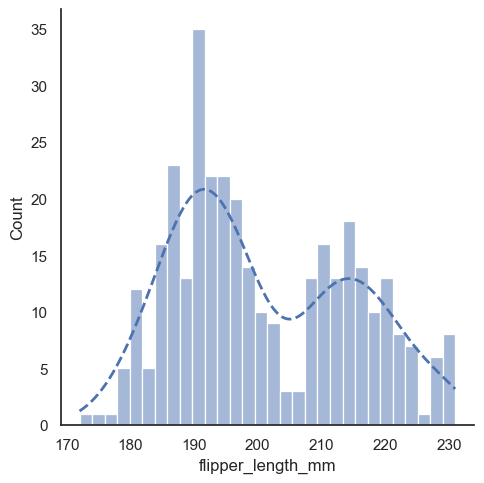

In [15]:
sns.displot(data=penguins, x="flipper_length_mm", bins = 30, 
            kind = 'hist', kde = True, line_kws= dict(lw = 2, ls = '--'))

>**Note**: Not sure if in newer *Seaborn* versions, the `line_kws` content can be pass as normal attributes and *Seaborn* manages it behing scenes.

#### fill
`boolean` attribute that determines whether to show a colorful-bar or only its edges.
- `True` by default.

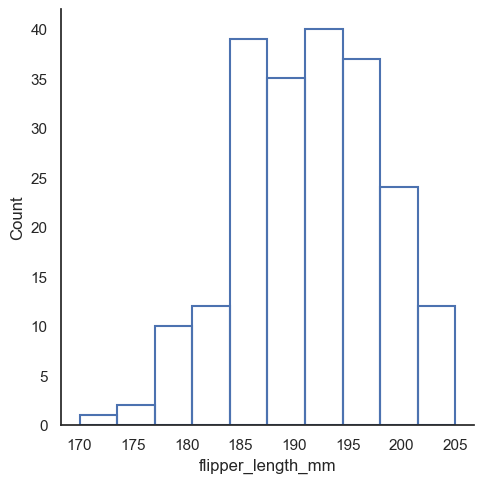

In [16]:
sns.displot(data=penguins, x="flipper_length_mm", bins = 10,
             binrange =(170, 205), kind = 'hist', fill = False)

#### multiple
Approach to show an histogram plot when bars overlap. 

- Only relevant when plotting two or more distributions in a single plot.

Possible values:
- layer (default)
- stack
- dodge
- fill

Text(0.5, 1.05, 'Multiple`s values')

<Figure size 640x480 with 0 Axes>

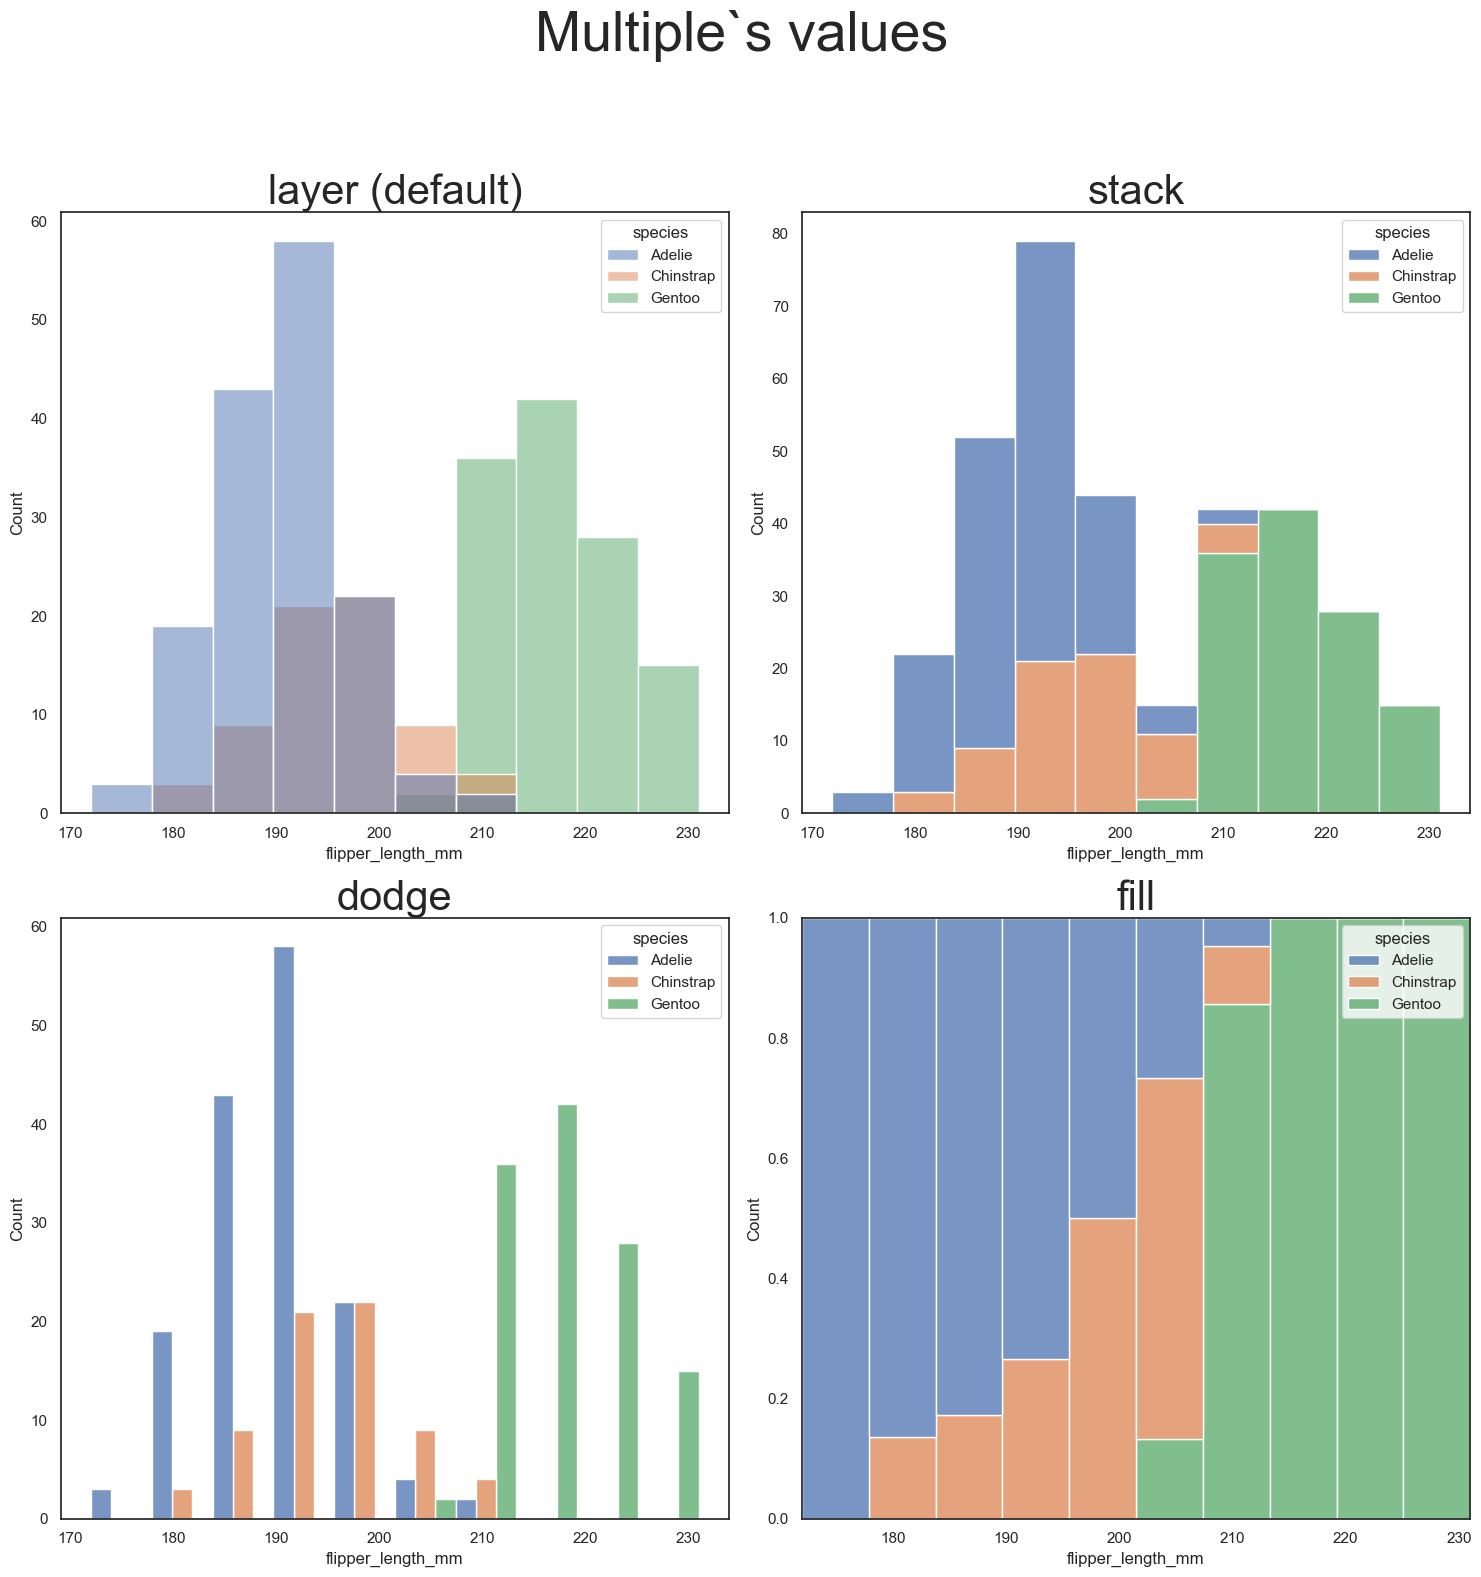

In [17]:
fig = plt.figure()
fig,ax = plt.subplots(2,2, tight_layout = True, figsize = (15,15))

# layer (default) 
sns.histplot(data = penguins, x ="flipper_length_mm",
            multiple = 'layer', hue = 'species', ax = ax[0,0])
ax[0,0].set_title('layer (default)', fontsize = 30)

# stack
sns.histplot(data = penguins, x ="flipper_length_mm",
            multiple = 'stack', hue = 'species', ax = ax[0,1])
ax[0,1].set_title('stack', fontsize = 30)

# dodge
sns.histplot(data = penguins, x ="flipper_length_mm",
            multiple = 'dodge', hue = 'species', ax = ax[1,0])
ax[1,0].set_title('dodge', fontsize = 30)

# fill
sns.histplot(data = penguins, x ="flipper_length_mm",
            multiple = 'fill', hue = 'species', ax = ax[1,1])
ax[1,1].set_title('fill', fontsize = 30)

fig.suptitle('Multiple`s values', fontsize = 40, y = 1.05)

#### element
Different histogram's styles

Text(0.5, 0.98, 'element`s values')

<Figure size 640x480 with 0 Axes>

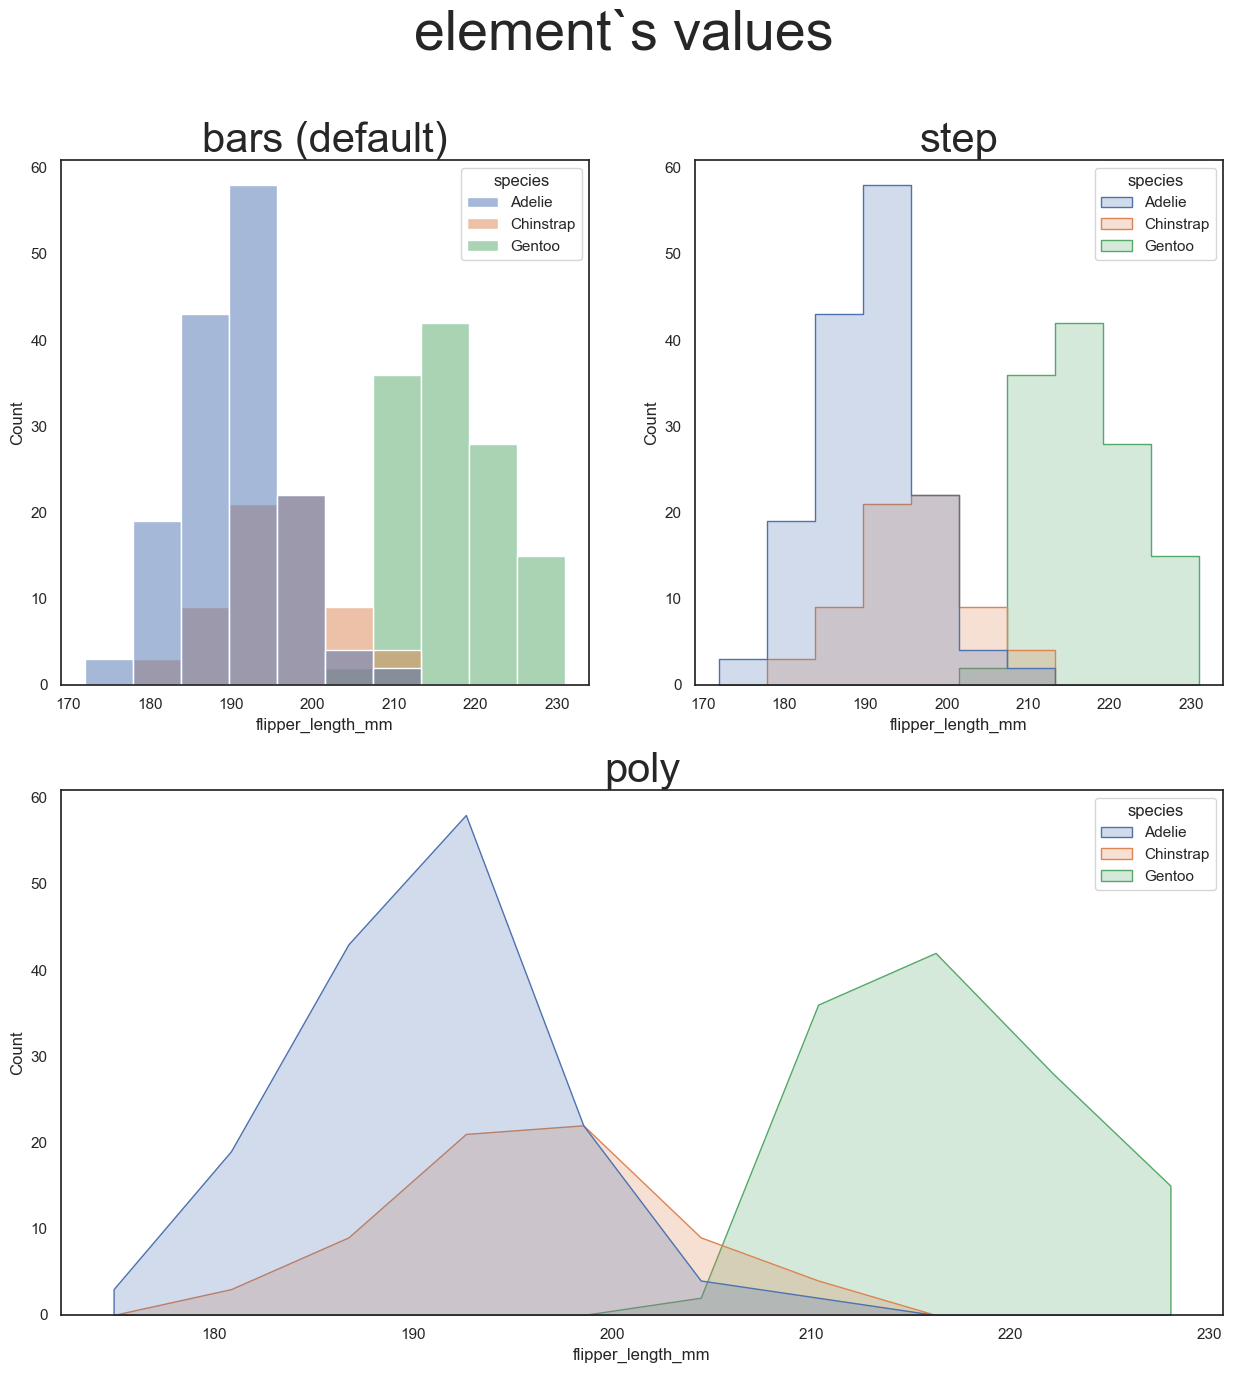

In [18]:
layout = [['id1', 'id2'],
          ['id3', 'id3']]

fig = plt.figure()
fig,ax = plt.subplot_mosaic(layout, figsize = (15,15))

# bars (default) 
sns.histplot(data = penguins, x ="flipper_length_mm",
            element = 'bars', hue = 'species', ax = ax['id1'])
ax['id1'].set_title('bars (default)', fontsize = 30)

# step
sns.histplot(data = penguins, x ="flipper_length_mm",
            element = 'step', hue = 'species', ax = ax['id2'])
ax['id2'].set_title('step', fontsize = 30)

# poly
sns.histplot(data = penguins, x ="flipper_length_mm",
            element = 'poly', hue = 'species', ax = ax['id3'])
ax['id3'].set_title('poly', fontsize = 30)


fig.suptitle('element`s values', fontsize = 40)

#### cumulative
`boolean` attribute.
- If `True` plots the CDF (Cumulative Ditribution Function)

Use the `sns.ecdf` `alf` function instead ([here](#ecd)).

###  <a id = 'kde'>KDE</a>
This plots the PDF (=Probability Density Function). We saw it can be used with `sns.histplot()`. But sometimes, we may want just to plot a standalone PDF.

A PDF plot is a method for visualizing the distribution of observations in a dataset, **analogous to a histogram**.

PDF can produce a plot that is less cluttered and more interpretable, **especially when drawing multiple distributions**.

Most of its attributes are the same as the one we've seen in the `sns.histplot()`.

#### fill
`boolean` attribute. 
- `False` by default

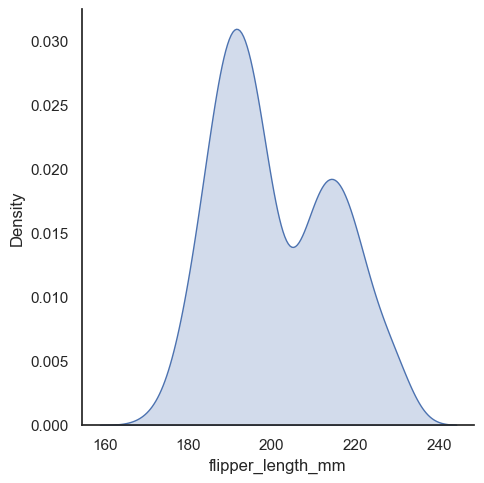

In [19]:
sns.displot(data=penguins, x="flipper_length_mm", kind = 'kde', 
            fill = True)

#### multiple
Approach to show a PDF plot when bars overlap. 

- Only relevant when plotting two or more distributions in a single plot.

Possible values:
- layer (default)
- stack
- fill

Text(0.5, 0.98, 'Multiple`s values')

<Figure size 640x480 with 0 Axes>

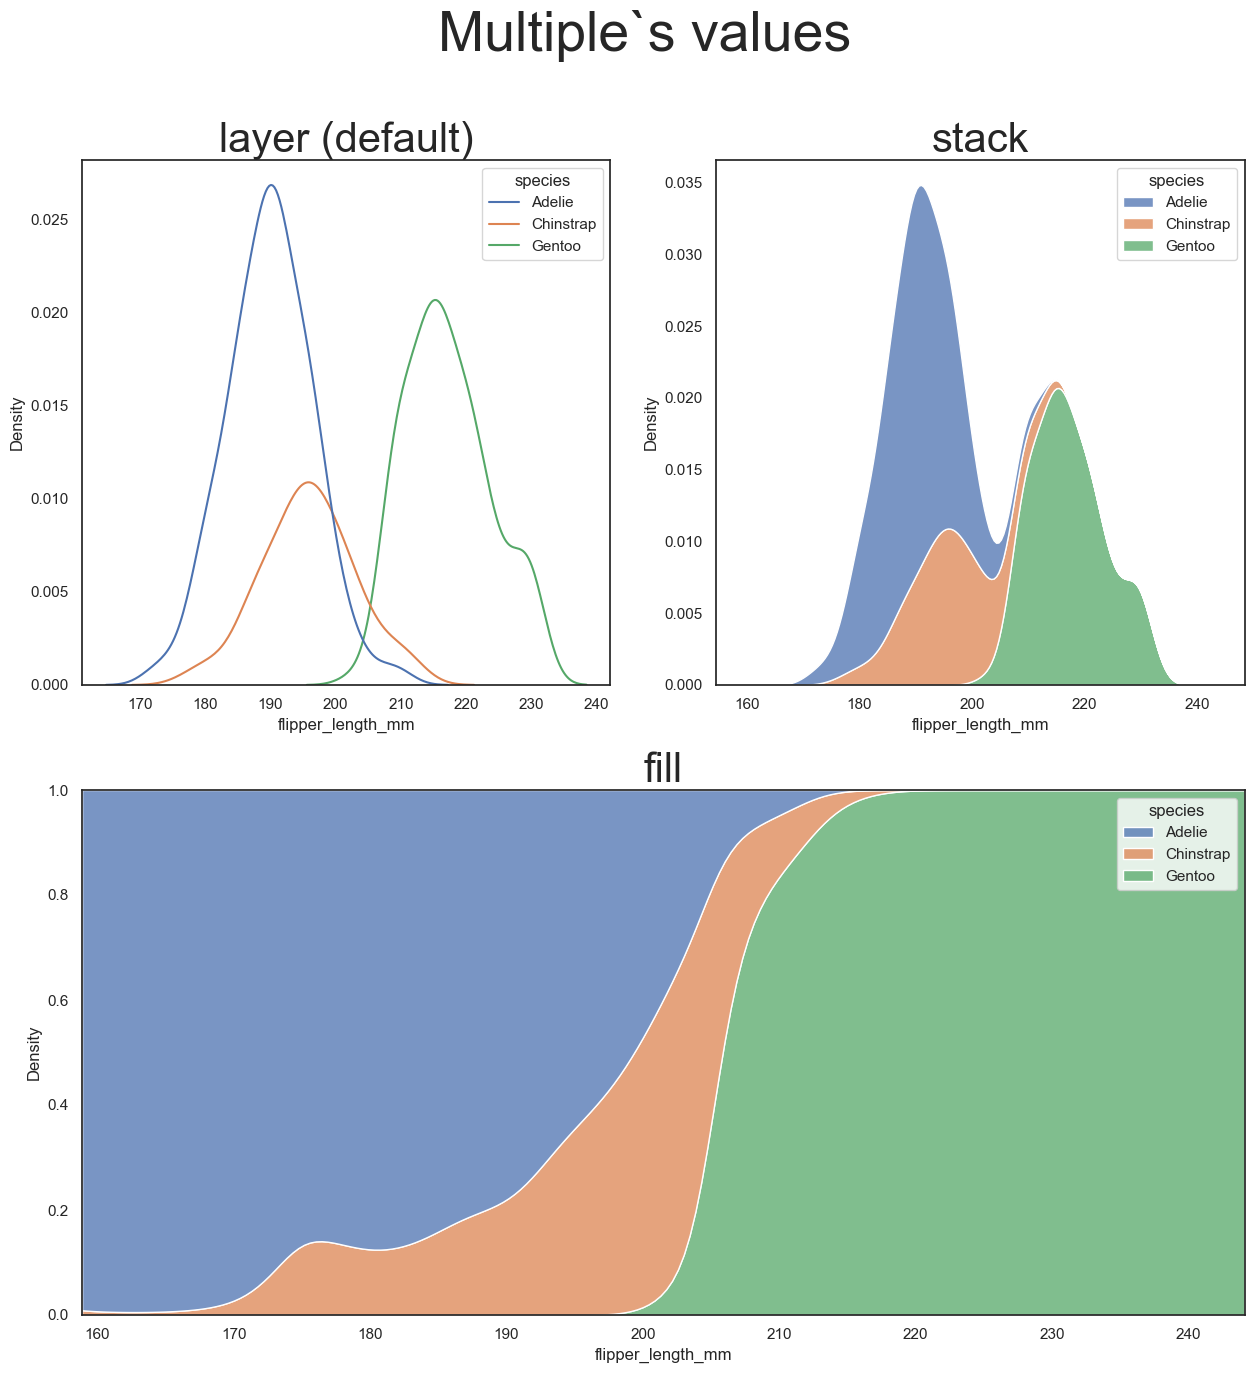

In [20]:
layout = [['id1', 'id2'],
          ['id3', 'id3']]

fig = plt.figure()
fig,ax = plt.subplot_mosaic(layout, figsize = (15,15))

# layer (default) 
sns.kdeplot(data = penguins, x ="flipper_length_mm",
            multiple = 'layer', hue = 'species', ax = ax['id1'])
ax['id1'].set_title('layer (default)', fontsize = 30)

# stack
sns.kdeplot(data = penguins, x ="flipper_length_mm",
            multiple = 'stack', hue = 'species', ax = ax['id2'])
ax['id2'].set_title('stack', fontsize = 30)

# fill
sns.kdeplot(data = penguins, x ="flipper_length_mm",
            multiple = 'fill', hue = 'species', ax = ax['id3'])
ax['id3'].set_title('fill', fontsize = 30)


fig.suptitle('Multiple`s values', fontsize = 40)

#### line properties
Use `ls` and `lw` to modify the line's style and width respectively.

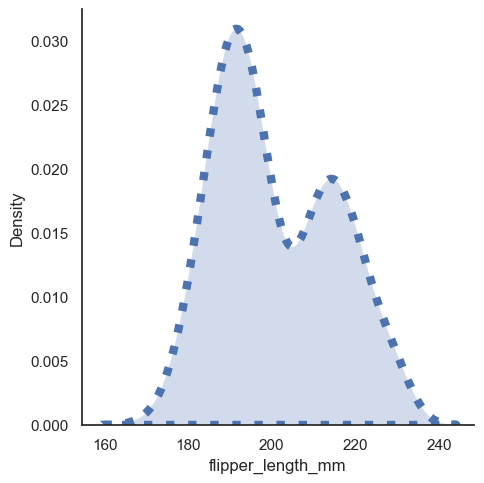

In [21]:
sns.displot(data=penguins, x="flipper_length_mm", kind = 'kde', 
            lw = 6, ls = ':', fill = True)

#### level functions
You can plot level functions (funciones de nivel) using `kde` with **two variables**.  

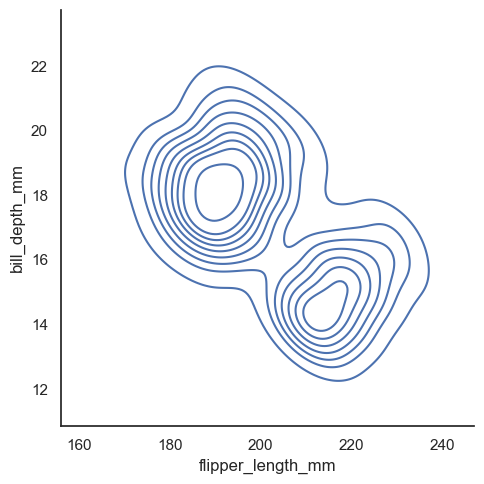

In [22]:
sns.displot(data=penguins, x="flipper_length_mm", y = 'bill_depth_mm',
            kind = 'kde')

###  <a id = 'ecd'>ecdfplot (CDF)</a>
With this function we can plot the `CDF` (= Cumulative Distribution Function) which is the opposite  to the PDF. They are often displayed together.

`CDF` shows the probability of an **interval** in *discrete* and *continuous*  variables and the probability of a **single value** in *discrete* variables.

- That means, the maximum value of a `CDF` is 1.

#### stat
It has only two `stat` possible values (compared to the 5 ones that `sns.histplot()` has.

Possible values are:
- **proportion (or probability)** (default): normalize such that total sum is 1
- **count** (default): The maximum is the total observations

Text(0.5, 0.98, 'stat`s values')

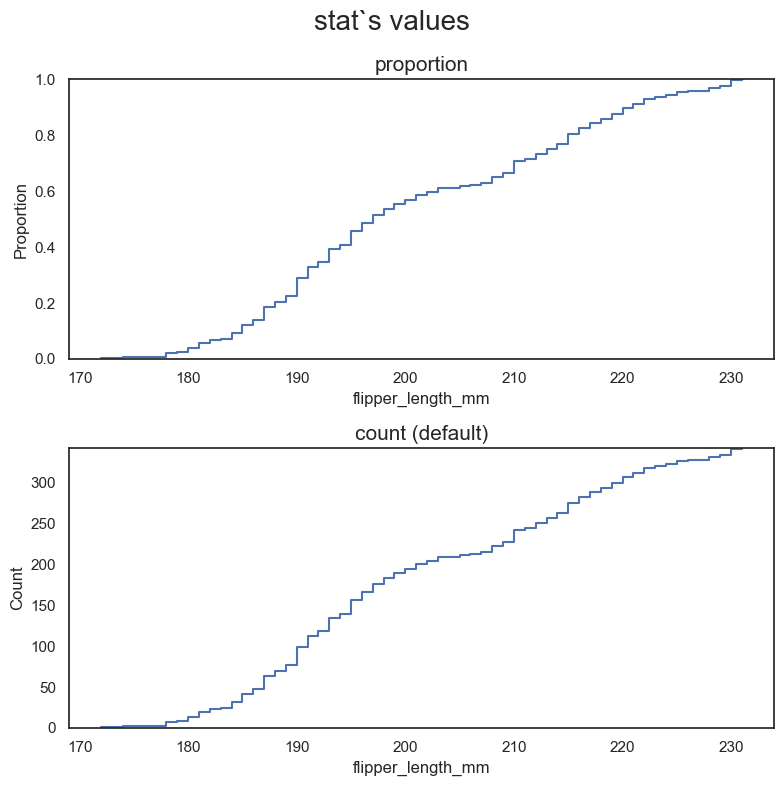

In [23]:
# look at the y_max values in both subplots

fig,ax = plt.subplots(2,1, figsize = (8,8), layout = 'tight')

# proportion (default) 
sns.ecdfplot(data = penguins, x ="flipper_length_mm", ax = ax[0])
ax[0].set_title('proportion', fontsize = 15)

# count 
sns.ecdfplot(data = penguins, x ="flipper_length_mm",
            stat = 'count', ax = ax[1])
ax[1].set_title('count (default)', fontsize = 15)


fig.suptitle('stat`s values', fontsize = 20)

>**Note**: `stat = percent` may have been added in newer *Seaborn* versions.

#### complementary
`boolean` attribute. If set to `True` plot the complementary (1 - CDF).

- `False` by default.

Text(0.5, 0.98, 'complementary')

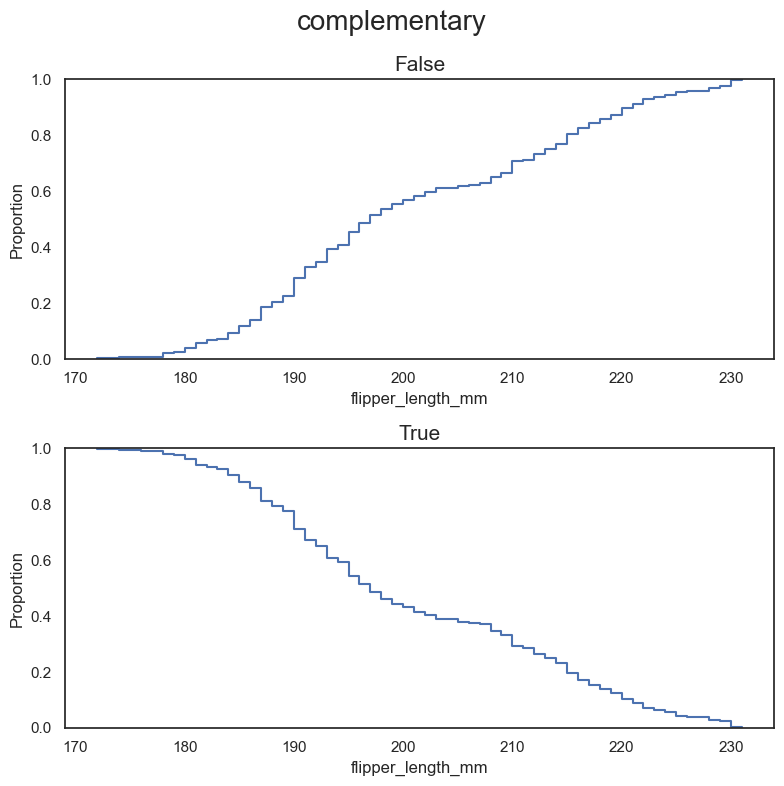

In [24]:
fig,ax = plt.subplots(2,1, figsize = (8,8), layout = 'tight')

# count (default) 
sns.ecdfplot(data = penguins, x ="flipper_length_mm",
            complementary = False, ax = ax[0])
ax[0].set_title('False', fontsize = 15)

# proportion
sns.ecdfplot(data = penguins, x ="flipper_length_mm",
            complementary = True, ax = ax[1])
ax[1].set_title('True', fontsize = 15)



fig.suptitle('complementary', fontsize = 20)

###  <a id = 'rug'>rugplot</a>
As mentioned at the beginning of this notebook `sns.displot(kind = 'rug')` doesn't exist. 
`rugplot()` by itself means nothing. It is used along with other `alf` like the `kde` or `scatterplot` or `ecdf`. To  plot the `rug` function along with other `alf` using `displot`, set the attribtue `rug = True`.

`rugplot()` is useful to take a better look at where is our data more concentrated. 

- In other words, with `rugplot()` we can see better where we have the most amount of data.

Rugplot draws marginal distributions by drawing ticks along the x and y axes.


In [25]:
tips = sns.load_dataset("tips")
tips.head(6)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

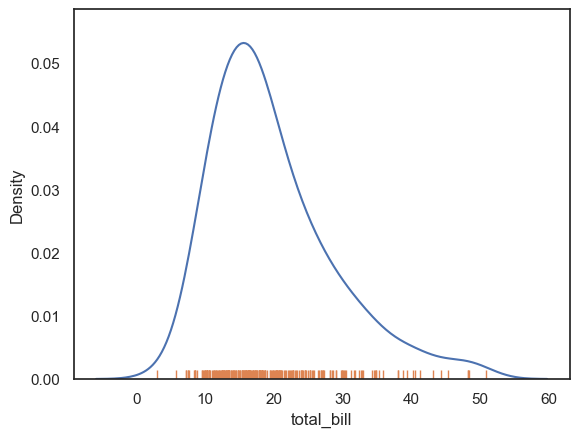

In [26]:
# using rugplot with PDF

sns.kdeplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x="total_bill")

<AxesSubplot:xlabel='total_bill', ylabel='Proportion'>

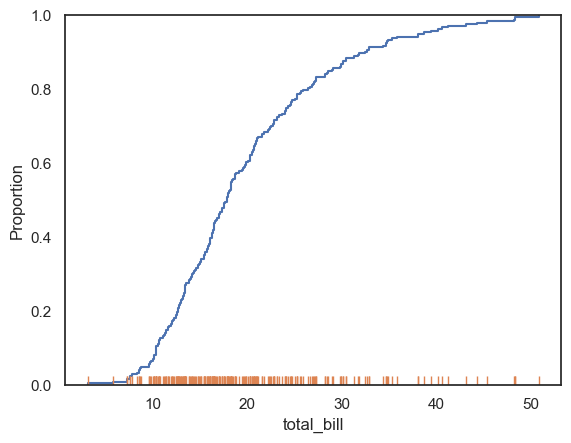

In [27]:
# using rugplot with CDF

sns.ecdfplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x="total_bill")

>**Note**: Notice that the steeper the slope is, the more ticks we have. 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

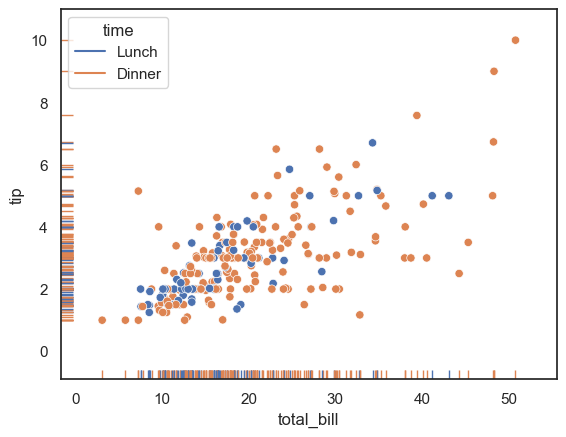

In [28]:
# using rugplot with scatterplot

sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
sns.rugplot(data=tips, x="total_bill", y="tip", hue="time")

<p style="text-align:center"><b>This notebook has been done by:</b></p>
<p style="text-align:center"><i>Javier Coque</i></p>
<p style="text-align:center"><i>University of U-tad: Double Degree in software engineering and computational mathematics</i></p>

LinkedIn: <a href="https://www.linkedin.com/in/javier-coque-92b934278/">Javier Coque</a>